<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(1_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.945866,34.620909,78.345773,65.873993,3.444038,228.230579,212.996347,15.234232
1,0.0,1.0,95.837206,23.140728,35.795618,93.238930,-14.320093,243.692390,259.168580,-15.476190
2,0.0,2.0,48.563620,98.267473,42.464114,70.622104,103.440030,373.357340,270.687773,102.669568
3,0.0,3.0,39.954498,50.790642,60.470564,48.858982,-25.572798,184.501888,207.619712,-23.117823
4,0.0,4.0,54.374626,74.092490,76.624742,88.514838,-5.896410,297.710287,294.533537,3.176750
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,67.559994,61.911839,32.504656,93.865133,-2.645965,263.195658,246.547644,16.648015
59996,999.0,56.0,63.436182,54.606862,86.901057,91.406381,-0.260287,306.090195,311.044145,-4.953951
59997,999.0,57.0,86.311548,93.934794,53.282379,27.395438,65.256235,336.180395,266.227255,69.953140
59998,999.0,58.0,78.564703,51.969260,63.338629,27.752724,-5.736626,225.888690,239.770543,-13.881852


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    35.945866  34.620909  78.345773  65.873993    3.444038   
      1.0    95.837206  23.140728  35.795618  93.238930  -14.320093   
      2.0    48.563620  98.267473  42.464114  70.622104  103.440030   
      3.0    39.954498  50.790642  60.470564  48.858982  -25.572798   
      4.0    54.374626  74.092490  76.624742  88.514838   -5.896410   
...                ...        ...        ...        ...         ...   
999.0 55.0   67.559994  61.911839  32.504656  93.865133   -2.645965   
      56.0   63.436182  54.606862  86.901057  91.406381   -0.260287   
      57.0   86.311548  93.934794  53.282379  27.395438   65.256235   
      58.0   78.564703  51.969260  63.338629  27.752724   -5.736626   
      59.0   80.878153  61.605977  34.625547  28.730688  -54.734226   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    228.230579  212.996347   15.234232  
      1.0    243.692390  259.168580  -15.476190  
      2.0    373.357340  270.687773  102.669568  
      3.0    184.501888  207.619712  -23.117823  
      4.0    297.710287  294.533537    3.176750  
...                 ...         ...         ...  
999.0 55.0   263.195658  246.547644   16.648015  
      56.0   306.090195  311.044145   -4.953951  
      57.0   336.180395  266.227255   69.953140  
      58.0   225.888690  239.770543  -13.881852  
      59.0   161.106139  210.226184  -49.120045  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    35.945866  34.620909  78.345773  65.873993    3.444038   
      1.0    95.837206  23.140728  35.795618  93.238930  -14.320093   
      2.0    48.563620  98.267473  42.464114  70.622104  103.440030   
      3.0    39.954498  50.790642  60.470564  48.858982  -25.572798   
      4.0    54.374626  74.092490  76.624742  88.514838   -5.896410   
...                ...        ...        ...        ...         ...   
999.0 55.0   67.559994  61.911839  32.504656  93.865133   -2.645965   
      56.0   63.436182  54.606862  86.901057  91.406381   -0.260287   
      57.0   86.311548  93.934794  53.282379  27.395438   65.256235   
      58.0   78.564703  51.969260  63.338629  27.752724   -5.736626   
      59.0   80.878153  61.605977  34.625547  28.730688  -54.734226   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    228.230579  212.996347   15.234232  
      1.0    243.692390  259.168580  -15.476190  
      2.0    373.357340  270.687773  102.669568  
      3.0    184.501888  207.619712  -23.117823  
      4.0    297.710287  294.533537    3.176750  
...                 ...         ...         ...  
999.0 55.0   263.195658  246.547644   16.648015  
      56.0   306.090195  311.044145   -4.953951  
      57.0   336.180395  266.227255   69.953140  
      58.0   225.888690  239.770543  -13.881852  
      59.0   161.106139  210.226184  -49.120045  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.945866,34.620909,78.345773,65.873993,3.444038,228.230579,212.996347,15.234232
1,0.0,1.0,95.837206,23.140728,35.795618,93.238930,-14.320093,243.692390,259.168580,-15.476190
2,0.0,2.0,48.563620,98.267473,42.464114,70.622104,103.440030,373.357340,270.687773,102.669568
3,0.0,3.0,39.954498,50.790642,60.470564,48.858982,-25.572798,184.501888,207.619712,-23.117823
4,0.0,4.0,54.374626,74.092490,76.624742,88.514838,-5.896410,297.710287,294.533537,3.176750
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,67.559994,61.911839,32.504656,93.865133,-2.645965,263.195658,246.547644,16.648015
59996,999.0,56.0,63.436182,54.606862,86.901057,91.406381,-0.260287,306.090195,311.044145,-4.953951
59997,999.0,57.0,86.311548,93.934794,53.282379,27.395438,65.256235,336.180395,266.227255,69.953140
59998,999.0,58.0,78.564703,51.969260,63.338629,27.752724,-5.736626,225.888690,239.770543,-13.881852


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    35.945866  34.620909  78.345773  65.873993    3.444038   
      1.0    95.837206  23.140728  35.795618  93.238930  -14.320093   
      2.0    48.563620  98.267473  42.464114  70.622104  103.440030   
      3.0    39.954498  50.790642  60.470564  48.858982  -25.572798   
      4.0    54.374626  74.092490  76.624742  88.514838   -5.896410   
...                ...        ...        ...        ...         ...   
999.0 55.0   67.559994  61.911839  32.504656  93.865133   -2.645965   
      56.0   63.436182  54.606862  86.901057  91.406381   -0.260287   
      57.0   86.311548  93.934794  53.282379  27.395438   65.256235   
      58.0   78.564703  51.969260  63.338629  27.752724   -5.736626   
      59.0   80.878153  61.605977  34.625547  28.730688  -54.734226   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    228.230579  212.996347   15.234232  
      1.0    243.692390  259.168580  -15.476190  
      2.0    373.357340  270.687773  102.669568  
      3.0    184.501888  207.619712  -23.117823  
      4.0    297.710287  294.533537    3.176750  
...                 ...         ...         ...  
999.0 55.0   263.195658  246.547644   16.648015  
      56.0   306.090195  311.044145   -4.953951  
      57.0   336.180395  266.227255   69.953140  
      58.0   225.888690  239.770543  -13.881852  
      59.0   161.106139  210.226184  -49.120045  

[60000 rows x 8 columns]

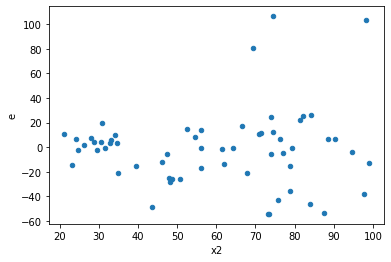

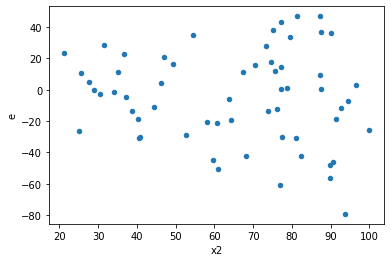

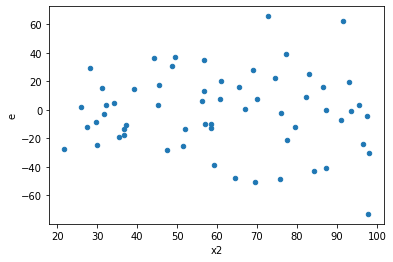

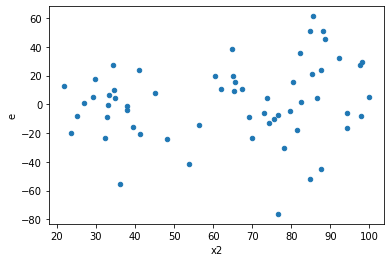

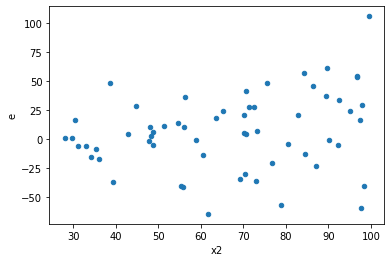

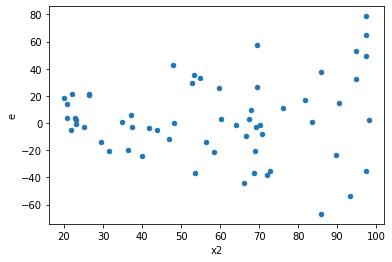

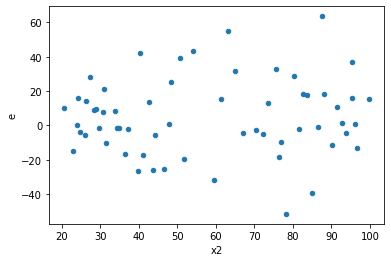

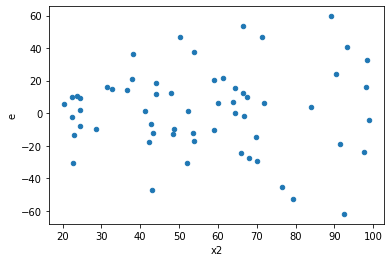

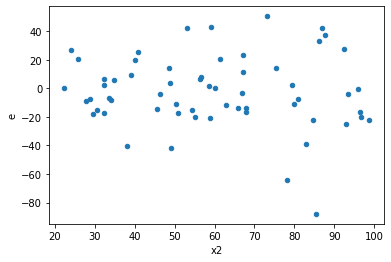

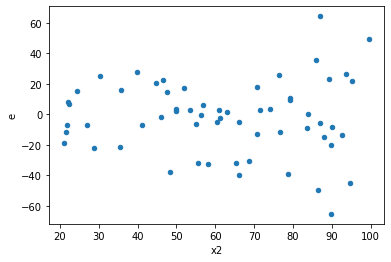

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,17.0,35.0,5309.670007098902,32344.466684286523,312.3335298293472,924.1276195510435,2.958784540538982,0.006488565690830228,0.9967557171545849,0.003244282845415114,Reject001=0 : Heteroscedasticity
4.0,27.0,25.0,15910.646217814585,36781.870897959496,589.283193252392,1471.2748359183797,2.4967194937260455,0.024258606323750875,0.9878706968381246,0.012129303161875438,Reject001=1 : Homoscedasticity
9.0,23.0,29.0,8977.222863393552,20553.78731164773,390.3140375388501,708.7512866085425,1.8158488254166278,0.12909346056373683,0.9354532697181316,0.06454673028186841,Reject001=1 : Homoscedasticity
12.0,25.0,27.0,6518.25696452759,28459.30984747896,260.7302785811036,1054.0485128695911,4.042677814812043,0.0006050632187011296,0.9996974683906494,0.0003025316093505648,Reject001=0 : Heteroscedasticity
13.0,34.0,18.0,21659.203377310507,13506.135370095164,637.035393450309,750.3408538941758,1.1778636816867931,0.7284654094442522,0.6357672952778739,0.3642327047221261,Reject001=1 : Homoscedasticity
15.0,28.0,24.0,15251.050484543586,20633.089623105676,544.6803744479852,859.7120676294031,1.5783790053032327,0.25954287577138535,0.8702285621143073,0.12977143788569268,Reject001=1 : Homoscedasticity
16.0,25.0,27.0,9147.502798548876,16456.37004446301,365.90011194195506,609.4951868319632,1.6657420070116051,0.19708209156189405,0.901458954219053,0.09854104578094702,Reject001=1 : Homoscedasticity
19.0,25.0,27.0,19115.01710618285,24323.743345796982,764.600684247314,900.879383177666,1.178235125521117,0.675129208360354,0.662435395819823,0.337564604180177,Reject001=1 : Homoscedasticity
21.0,25.0,27.0,14108.39853816988,22023.481592305925,564.3359415267952,815.684503418738,1.445388187064475,0.3502248729139881,0.824887563543006,0.17511243645699404,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,29.0,31057.800689246233,18083.868435100998,1350.33916040201,623.5816701758965,0.4617963312196691,0.06110252957437556,Reject001=1 : Homoscedasticity
1.0,30.0,22.0,37384.71927034553,9422.936302332528,1246.1573090115176,428.31528646966035,0.3437088426736513,0.007023274813388724,Reject001=0 : Heteroscedasticity
2.0,17.0,35.0,5309.670007098902,32344.466684286523,312.3335298293472,924.1276195510435,2.958784540538982,0.006488565690830228,Reject001=0 : Heteroscedasticity
3.0,31.0,21.0,25829.873661709662,8453.739012826209,833.2217310228923,402.5590006107718,0.4831355035790728,0.0641922588461286,Reject001=1 : Homoscedasticity
4.0,27.0,25.0,15910.646217814585,36781.870897959496,589.283193252392,1471.2748359183797,2.4967194937260455,0.024258606323750875,Reject001=1 : Homoscedasticity
5.0,19.0,33.0,17304.426720601994,23008.334491251266,910.7593010843154,697.2222573106444,0.7655395409967903,0.5456709928960577,Reject001=1 : Homoscedasticity
6.0,26.0,26.0,17317.179337227757,8174.379716943293,666.0453591241445,314.39921988243435,0.4720387516788227,0.06089921454728632,Reject001=1 : Homoscedasticity
7.0,31.0,21.0,23974.41007939358,11860.020110442838,773.3680670772122,564.7628624020399,0.7302640055160884,0.41741877731118876,Reject001=1 : Homoscedasticity
8.0,31.0,21.0,24418.068360410616,9551.102588790367,787.6796245293747,454.81440899001745,0.5774104024358399,0.160865313612592,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      869
Reject001=0 : Heteroscedasticity    131
Name: Result_test, dtype: int64